## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize

In [2]:
Forcast=pd.read_csv('/Users/Asus/Documents/InternCsv/Forcast_Official.csv')

In [3]:
Forcast.head(4)

,Unnamed: 0,Plant,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Date
0,0,WPS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,47.241,47.241,0.000,0.000,0.000,0.000,0.000,10.000,10.000,2020 - 07 - 10
1,1,Canyon,28.065,11.040,11.040,0.000,0.000,0.000,0.000,0.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,19.700,2020 - 07 - 10
2,2,Olax,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,...,54.000,38.820,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2020 - 07 - 10
3,3,Nlax,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,...,71.915,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,2020 - 07 - 10


In [4]:
Forcast.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
Forcast.head(5)

,Plant,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Date
0,WPS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,47.241,47.241,0.000,0.000,0.000,0.000,0.000,10.000,10.000,2020 - 07 - 10
1,Canyon,28.065,11.040,11.040,0.000,0.000,0.000,0.000,0.0000,11.0400,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,19.700,2020 - 07 - 10
2,Olax,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.0000,10.0000,...,54.000,38.820,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2020 - 07 - 10
3,Nlax,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.4720,60.4720,...,71.915,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,2020 - 07 - 10
4,Polp,78.479,43.419,28.770,28.770,15.620,15.620,15.620,7.2701,7.2701,...,78.479,78.479,65.290,38.314,38.314,38.314,38.314,38.314,38.314,2020 - 07 - 10


In [6]:
Plant_Forcast=Forcast.groupby(["Plant"])

In [7]:
Plant_Sum=Plant_Forcast.sum()

In [8]:
Plant_Sum["Total_Dispatch"] = Plant_Sum.sum(axis=1)

In [9]:
Plant_Sum.head(5)

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total_Dispatch
Plant,,,,,,,,,,,,,,,,,,,,,
ACE EMBP,664.59440,491.6603,443.6441,455.0947,434.8058,402.7511,367.7511,349.7511,418.422,497.9831,...,1989.0882,1999.0433,1986.4342,1925.7379,1916.2499,1872.5425,1764.61210,1491.7185,799.6197,73443.13790
ACE Matara,48.00000,24.0000,16.0000,24.0000,16.0000,16.0000,16.0000,16.0000,16.000,49.3920,...,483.7350,467.7350,467.7350,443.7350,435.7350,394.7160,314.91000,225.8470,184.0000,16064.01400
ALTAQQA-Mahi.,0.13437,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,...,10.0000,10.0000,10.0000,10.0000,10.0000,0.0000,0.00000,0.0000,0.0000,330.13437
ALTAQQA-Pol.,8.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,...,8.0000,8.0000,8.0000,8.0000,8.0000,0.0000,0.11088,0.0000,0.0000,272.11088
Asia Power,42.00000,42.0000,40.0620,42.0000,32.9000,32.9000,32.9000,32.9000,62.400,110.9000,...,742.5000,742.5000,733.1000,728.4000,724.5000,704.2223,628.30000,406.7665,352.2000,26953.03220


In [10]:
Plant_Sum.reset_index(level=0,inplace=True)

## Linear Regression and Multiple Linear Regression

In [11]:
Plant_Sort=Plant_Sum.sort_values(by='Total_Dispatch', ascending=False)

In [14]:
#Plant_Sort
# import linear model using sklearn
from sklearn.linear_model import LinearRegression
# create linear regression object using constructor
lr = LinearRegression()

In [15]:
Plant_Sort.columns

Index(['Plant', '00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00',
       '03:30', '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00',
       '07:30', '08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00',
       '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00',
       '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00',
       '19:30', '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00',
       '23:30', 'Total_Dispatch'],
      dtype='object')

In [16]:
Plant_Sort.shape

(37, 50)

In [17]:
# variables
X = Plant_Sort.iloc[:,1:48]
y = Plant_Sort.iloc[:,49]

In [18]:
# fit variables
lr.fit(X, y)

LinearRegression()

In [19]:
yhat = lr.predict(X)
yhat

array([3.48610000e+05, 3.48319770e+05, 3.46298000e+05, 2.62575037e+05,
       7.97299662e+04, 7.34431379e+04, 7.18960690e+04, 6.21930880e+04,
       5.89350000e+04, 5.87363990e+04, 5.38921565e+04, 5.02887520e+04,
       4.43219464e+04, 4.09126300e+04, 3.65911390e+04, 3.22999950e+04,
       3.22327550e+04, 2.69530322e+04, 2.03627993e+04, 2.01812300e+04,
       1.74399350e+04, 1.74161893e+04, 1.62750000e+04, 1.60640140e+04,
       1.30226850e+04, 1.15199940e+04, 5.38639527e+03, 3.73155258e+03,
       1.55118005e+03, 1.41830800e+03, 1.18622100e+03, 3.30134370e+02,
       2.72110880e+02, 2.18278728e-11, 2.18278728e-11, 2.18278728e-11,
       2.18278728e-11])

In [20]:
# intercept
lr.intercept_

2.1827872842550278e-11

In [21]:
# coefficient
lr.coef_

array([ 0.97670618,  2.25756974, -0.11266132,  2.12433632,  0.44866021,
        1.02685132,  0.73181052,  1.45079734,  0.22209353,  1.79228507,
        0.48818772,  0.47138176,  1.35184121,  0.69985915,  0.78597234,
        1.25606355,  1.11445304,  1.22749439,  0.67615744,  1.09353452,
        0.71230711,  1.05354452,  0.23960179,  1.68702991,  0.35436488,
        1.65652529,  1.87313941,  1.54157537,  0.0670787 ,  1.35855261,
       -0.80819793,  0.86247152,  1.50768672,  2.01186749,  1.63206943,
        0.46606515,  1.10210352,  0.79271558,  1.76718041,  0.85340072,
        0.31735061,  1.09367954,  0.11246154,  2.06898172, -0.02263156,
        2.65806754,  0.9625508 ])

In [22]:
# score
lr.score(X, y)

1.0

(0.0, 366339.06023813464)

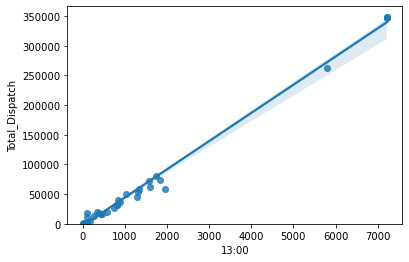

In [24]:
sns.regplot(x = "13:00", y = "Total_Dispatch", data = Plant_Sort)
plt.ylim(0,)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='13:00', ylabel='Total_Dispatch'>

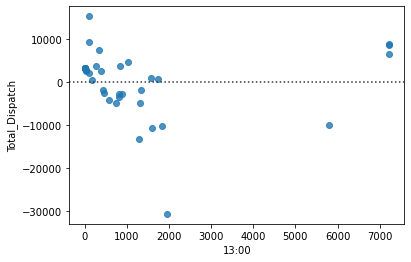

In [25]:
# Residual Plot
sns.residplot(Plant_Sort["13:00"], Plant_Sort["Total_Dispatch"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Dispatch', ylabel='Density'>

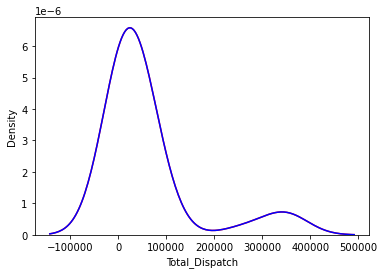

In [26]:
# distribution plots
ax1 = sns.distplot(Plant_Sort["Total_Dispatch"], hist = False, color = "r", label = "Actual Dispatch")
sns.distplot(yhat, hist = False, color = "b", label = "Fitted Dispacth", ax = ax1)

### Polynomial Regression and Pipelines

In [30]:
x = Plant_Sort['14:00'].astype("int")  #Selecting Peak Hours in Dispatching
y = Plant_Sort['Total_Dispatch'].astype("int") #Total Dispatch by Each Plants

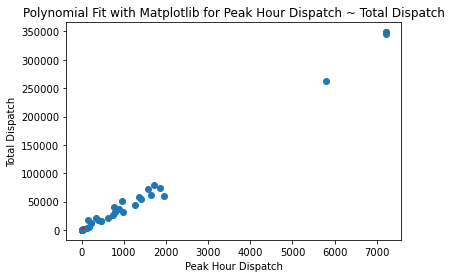

In [31]:
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(15, 55, 100)

plt.title("Polynomial Fit with Matplotlib for Peak Hour Dispatch ~ Total Dispatch")
plt.xlabel("Peak Hour Dispatch")
plt.ylabel("Total Dispatch")
plt.scatter(x, y)
plt.plot(myline, mymodel(myline), color = "r")
plt.show()

In [32]:
np.polyfit(x, y, 3)

array([ 2.10938164e-07, -2.57223068e-04,  3.88971473e+01,  1.34990859e+03])

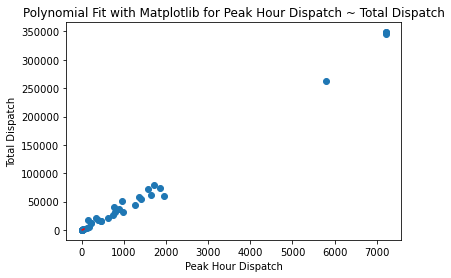

In [33]:
# 11 order polynomial model
model = np.poly1d(np.polyfit(x, y, 11))
line = np.linspace(15, 55, 100)

plt.scatter(x, y)
plt.title("Polynomial Fit with Matplotlib for Peak Hour Dispatch ~ Total Dispatch")
plt.xlabel("Peak Hour Dispatch")
plt.ylabel("Total Dispatch")

plt.plot(line, model(line), color = "r")
plt.show()

In [38]:
# degree = 2

pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [39]:
# fit data
Z = Plant_Sort.iloc[:,20:24]  #Peak Hours in Plant Dispatches
Z_pr = pr.fit_transform(Z) 

In [40]:
# The original data is of 37 samples and 4 features
Z.shape

(37, 4)

In [42]:
# after the transformation, there 37 samples and 15 features
Z_pr.shape

(37, 15)

## Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
# pipeline

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias = False)), ("model", LinearRegression())]

In [44]:
# we input the list as an argument to the pipeline constructor 
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
# fit
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [46]:
# e can normalize the data, perform a transform and produce a prediction simultaneously
ypipe = pipe.predict(Z)
ypipe[0:4]

array([346492.49491939, 346492.49491939, 346492.49491939, 268588.97113318])

In [47]:
# Standardized -----> Prediction

Input = [("scale", StandardScaler()), ("model", LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z, y)

ypipe = pipe.predict(Z)
ypipe[0:10]

array([340065.46112763, 340065.46112763, 340065.46112763, 272814.00923887,
        78982.49957406,  84479.38786519,  71249.76368392,  64907.34850641,
        88644.7301136 ,  60841.78455314])

## Simple Linear Regression

**R^2 / R-squared**

In [48]:
lm = LinearRegression()
x = Plant_Sort.iloc[:,20:24]       #Selecting Peak Hours in Plant Dispatches
y = Plant_Sort["Total_Dispatch"]

In [49]:
# R-Squared
lm.fit(x, y)
print('The R-square is: ', lm.score(x, y))  #Accuracy Rate is Very High

The R-square is:  0.9930703741701006


In [50]:
# Prediction
yhat = lm.predict(x)
print('The output of the first four predicted value is: ', yhat[0:4])

The output of the first four predicted value is:  [340065.68925715 340065.68925715 340065.68925715 272814.24516786]
